In [2]:
from plotnine import *
import plotnine

import pandas as pd
import numpy as np

from itertools import combinations

! pip install sweetviz 
import sweetviz as sv

In [19]:
all_df = pd.read_csv("../Dataset/final_data/final_data.csv")

# Plotting STAR score vs per pupil expenditures

## Percentage of at risk students and per pupil expenditures 

/opt/anaconda3/lib/python3.9/site-packages/plotnine/layer.py:411: PlotnineWarning: geom_point : Removed 1 rows containing missing values.


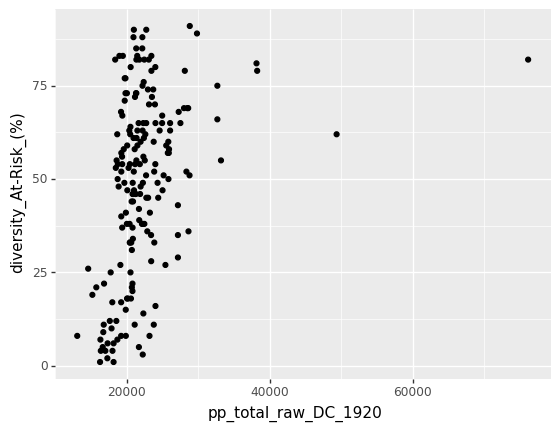

<ggplot: (8792517649297)>

In [11]:
ggplot(all_df, aes(x='pp_total_raw_DC_1920', y='diversity_At-Risk_(%)')) + geom_point()


Shows that school's with a higher percentage of at risk students tend to have hihger per pupil expenditures

## Change in STAR score plotted and change in per pupil expenditures by school's Risk level 

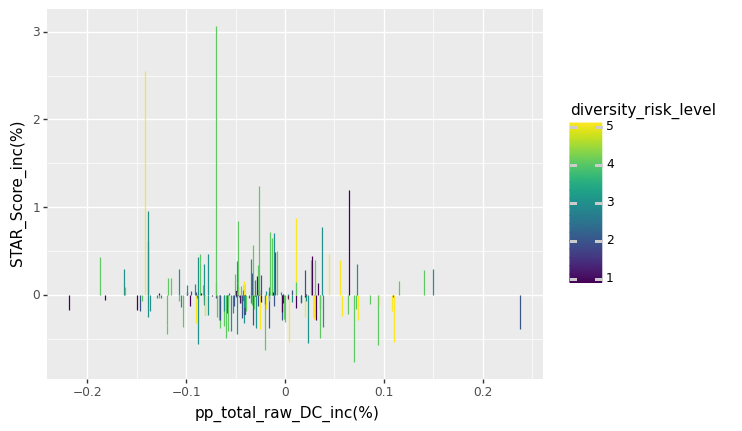

<ggplot: (8792517683017)>

In [14]:
(ggplot( all_df, aes(x='pp_total_raw_DC_inc(%)', y='STAR_Score_inc(%)', color='diversity_risk_level')) +
    geom_col())

## Change in per pupil expenditure and STAR score for each DC public school 

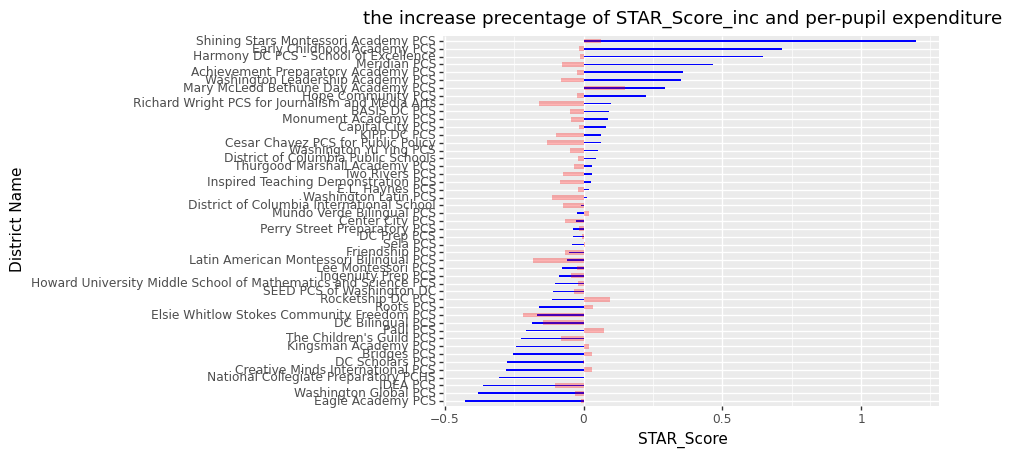

<ggplot: (8792517959162)>

In [15]:
(ggplot(Dist_data) 
    + geom_bar( aes(x ='reorder(distname, STAR_Score_inc)', y = 'STAR_Score_inc'),stat='identity', fill = "blue", width = 0.2) 
    + geom_bar(aes(x ='reorder(distname, STAR_Score_inc)', y = 'pp_total_raw_inc'), 
               stat='identity', alpha = 0.3, fill = "red", width = 0.6 )
    + labs(title = 'the increase precentage of STAR_Score_inc and per-pupil expenditure', x='District Name', y = "STAR_Score") 
    +coord_flip())

## Ward Information

In [16]:
wards_data = pd.DataFrame()

wards_data['pp_total_raw'] = all_df.groupby('Ward')['pp_total_raw_DC_inc(%)'].agg("mean")
wards_data['enroll_raw_DC_inc'] = all_df.groupby('Ward')['enroll_raw_DC_inc(%)'].agg("mean")
wards_data['STAR_Score'] = all_df.groupby('Ward')['STAR_Score_inc(%)'].agg("mean")
wards_data['STAR_Rating'] = all_df.groupby('Ward')['STAR_Rating_inc(%)'].agg("mean")
wards_data['Ward'] = wards_data.index

### Average change in STAR score for each ward 

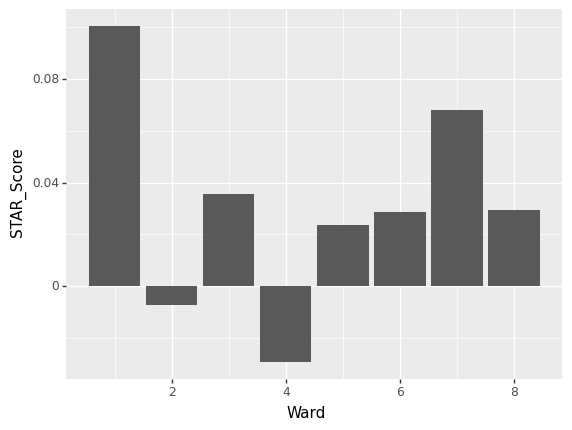

<ggplot: (8792518133703)>

In [17]:
(ggplot(wards_data) +
    geom_bar( aes(x ='Ward', y = 'STAR_Score'),stat='identity') )

### Average change in STAR score and per-pupil expenditure for each ward 

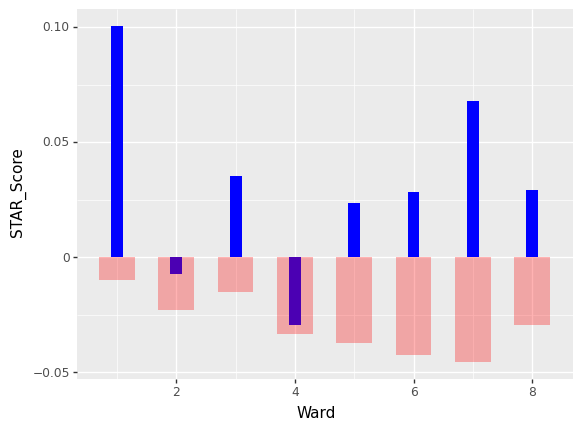

<ggplot: (8792518150864)>

In [18]:
(ggplot(wards_data) 
    + geom_bar( aes(x ='Ward', y = 'STAR_Score'),stat='identity', fill = "blue", width = 0.2) 
    + geom_bar(aes(x ='Ward', y = 'pp_total_raw'), stat='identity', alpha = 0.3, fill = "red", width = 0.6 ))

## School info by District 

In [10]:
Dist_data = pd.DataFrame()

Dist_data['pp_total_raw_inc'] = all_df.groupby('distname')['pp_total_raw_DC_inc(%)'].agg("mean")
Dist_data['pp_total_raw_1920'] = all_df.groupby('distname')['pp_total_raw_DC_1920'].agg("mean")
Dist_data['Risk(%)'] = all_df.groupby('distname')['diversity_At-Risk_(%)'].agg("mean")
Dist_data['pp_centshare_raw'] = all_df.groupby('distname')['pp_centshare_raw_DC_inc(%)'].agg("mean")
Dist_data['schoolstloc_raw'] = all_df.groupby('distname')['schoolstloc_raw_DC_inc(%)'].agg("mean")
Dist_data['enroll_raw_DC_inc'] = all_df.groupby('distname')['enroll_raw_DC_inc(%)'].agg("mean")
Dist_data['STAR_Score_inc'] = all_df.groupby('distname')['STAR_Score_inc(%)'].agg("mean")
Dist_data['STAR_Score_19'] = all_df.groupby('distname')['STAR_Score_19'].agg("mean")
Dist_data['STAR_Rating'] = all_df.groupby('distname')['STAR_Rating_inc(%)'].agg("mean")
Dist_data['distname'] = Dist_data.index